In [1]:
import math
from typing import List

import matplotlib.pyplot as plt
import numpy as np

from traj1D import BangBangTrajectory1D, BBTrajectoryPart

In [2]:
max_acc = 3.0
max_vel = 2.5

In [3]:
def get_data_from_part(part: BBTrajectoryPart, t_start=0.0) -> (np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    times = np.linspace(t_start, part.t_end, 200)
    acc = np.ones(times.shape) * part.acc
    vel = part.v0 + acc * (times - t_start)
    pos = part.s0 + 0.5 * (part.v0 + vel) * (times - t_start)
    return times, acc, vel, pos


def get_data_from_parts(parts: List[BBTrajectoryPart], t_start=0.0) -> (np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    times, acc, vel, pos = None, None, None, None
    t_start_new = t_start
    for part in parts:
        times_new, acc_new, vel_new, pos_new = get_data_from_part(part, t_start=t_start_new)
        t_start_new = part.t_end
        times = np.append(times, times_new) if times is not None else times_new
        acc = np.append(acc, acc_new) if acc is not None else acc_new
        vel = np.append(vel, vel_new) if vel is not None else vel_new
        pos = np.append(pos, pos_new) if pos is not None else pos_new
    return times, acc, vel, pos


def plot(times, acc, vel, pos, title, total_time):
    fig, (ax_p, ax_v, ax_a) = plt.subplots(1, 3, figsize=(20, 5))

    fig.suptitle(title, fontsize=20)

    ax_p.set_ylabel("Position [m]")
    ax_p.set_xlabel("time [s]")
    ax_p.plot(times, pos, color="green")
    if total_time is not None:
        ax_p.scatter(x=total_time, y=pos[-1], color="red")
    ax_p.grid(True)

    ax_v.set_ylim([-max_vel - 0.25, max_vel + 0.25])
    ax_v.set_ylim([-2.75, 2.75])
    ax_v.set_yticks([-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])
    ax_v.set_ylabel("Velocity [m/s]")
    ax_v.set_xlabel("time [s]")
    ax_v.plot(times, vel, color="red")
    ax_v.grid(True)

    ax_a.set_ylim([-max_acc - 0.25, max_acc + 0.25])
    ax_a.set_ylabel("Acceleration [m/s²]")
    ax_a.set_xlabel("time [s]")
    ax_a.plot(times, acc)
    ax_a.grid(True)

    plt.savefig(title + ".png")
    plt.show()


def plot_traj(distance: float, initial_vel: float, total_time: float = None, fallback=False):
    traj = BangBangTrajectory1D()
    traj.generate(0, distance, initial_vel, max_vel, max_acc, total_time)
    times = np.linspace(0, traj.getTotalTime(), 200)
    pos = [traj.getPosition(t) for t in times]
    vel = [traj.getVelocity(t) for t in times]
    acc = [traj.getAcceleration(t) for t in times]
    assert math.isclose(pos[-1], distance)
    assert math.isclose(vel[-1], 0.0)
    plot(times, acc, vel, pos, "Traj d={} | v={} | tt={}".format(distance, initial_vel, total_time), total_time)


def plot_calc_slowest_direct(distance: float, initial_vel: float, total_time: float = None, fallback=False):
    part = BangBangTrajectory1D.calcSlowestDirect(0, distance, initial_vel, max_acc)
    if part is None:
        if fallback:
            plot_traj(distance, initial_vel, total_time)
        return
    data = get_data_from_parts(part)
    assert math.isclose(data[-1][-1], distance)
    plot(*data, "CalcSlowest d={} | v={} | tt={}".format(distance, initial_vel, total_time), total_time)


def plot_calc_fastest_direct(distance: float, initial_vel: float, total_time: float = None, fallback=False):
    parts = BangBangTrajectory1D.calcFastestDirect(0, distance, initial_vel, max_vel, max_acc)
    data = get_data_from_parts(parts)
    assert math.isclose(data[-1][-1], distance)
    plot(*data, "CalcFastest d={} | v={} | tt={}".format(distance, initial_vel, total_time), total_time)


def plot_calc_fastest_overshot(distance: float, initial_vel: float, total_time: float = None, fallback=False):
    part = BangBangTrajectory1D.calcSlowestDirect(0, distance, initial_vel, max_acc)
    if part is None:
        return
    plot_calc_slowest_direct(distance, initial_vel, total_time, fallback)
    parts = BangBangTrajectory1D.calcFastestOvershot(0, distance, initial_vel, max_vel, max_acc)
    data = get_data_from_parts(parts)
    assert math.isclose(data[-1][-1], distance)
    plot(*data, "CalcFastestOvershot d={} | v={} | tt={}".format(distance, initial_vel, total_time), total_time)


def plot_can_reach(distance: float, initial_vel: float, total_time: float = None, fallback=False):
    can_reach, parts, reason = BangBangTrajectory1D.canReach(0, distance, initial_vel, max_vel, max_acc, total_time)
    data = get_data_from_parts(parts)
    assert math.isclose(data[-1][-1], distance)
    plot(*data, "CanReach {} - {} | d={} | v={} | tt={}".format(can_reach, reason, distance, initial_vel, total_time),
         total_time)
    if fallback:
        plot_traj(distance, initial_vel, total_time)


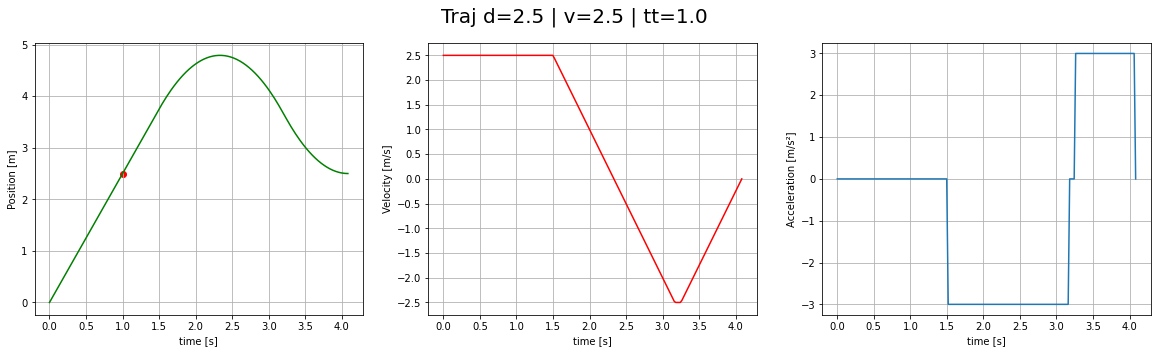

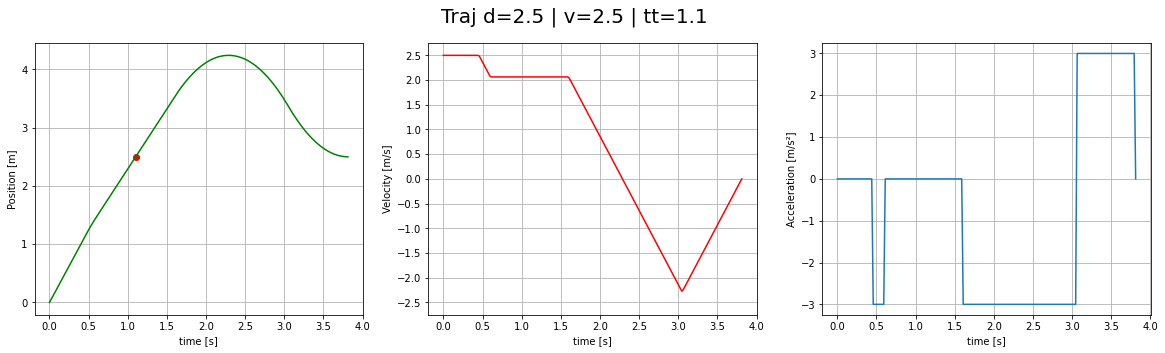

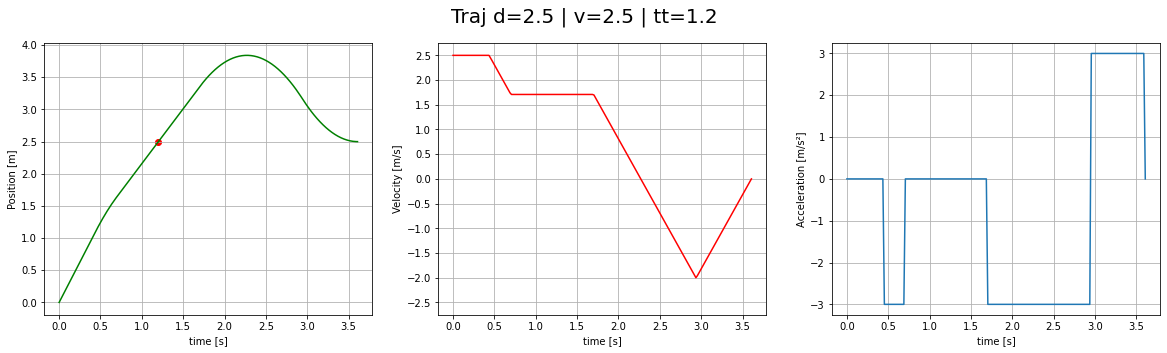

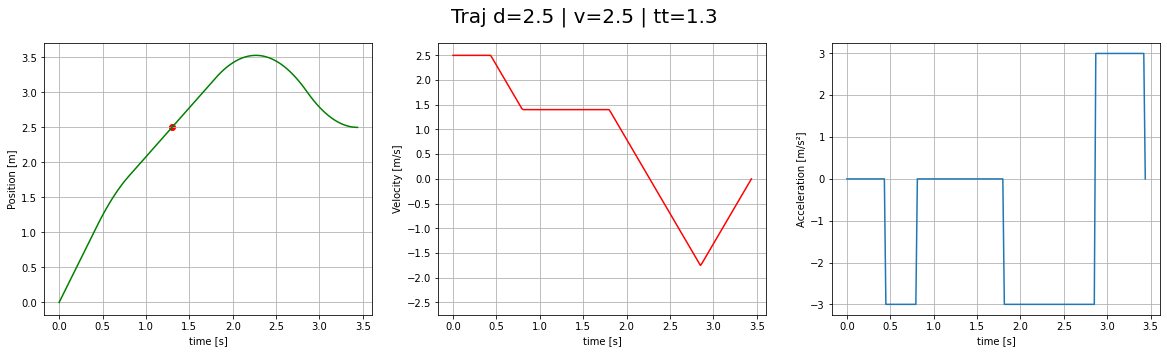

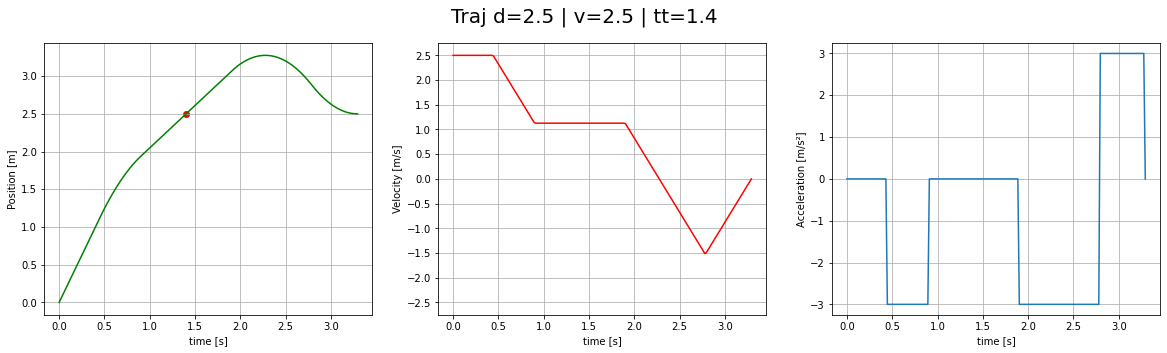

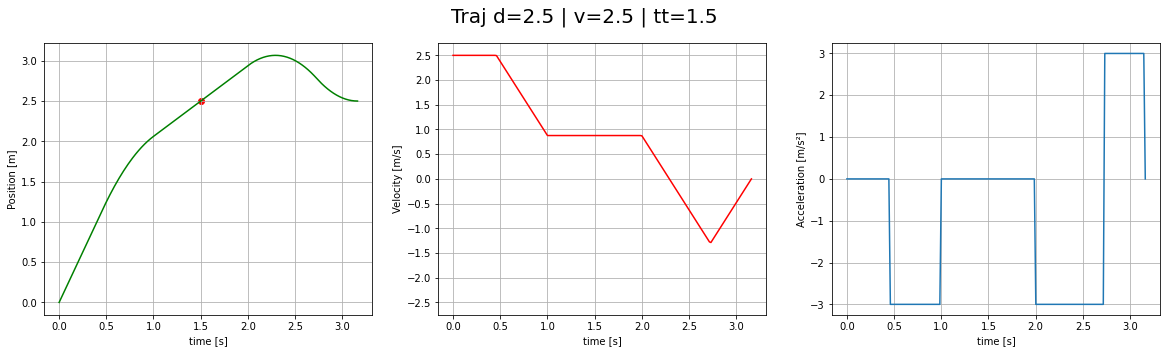

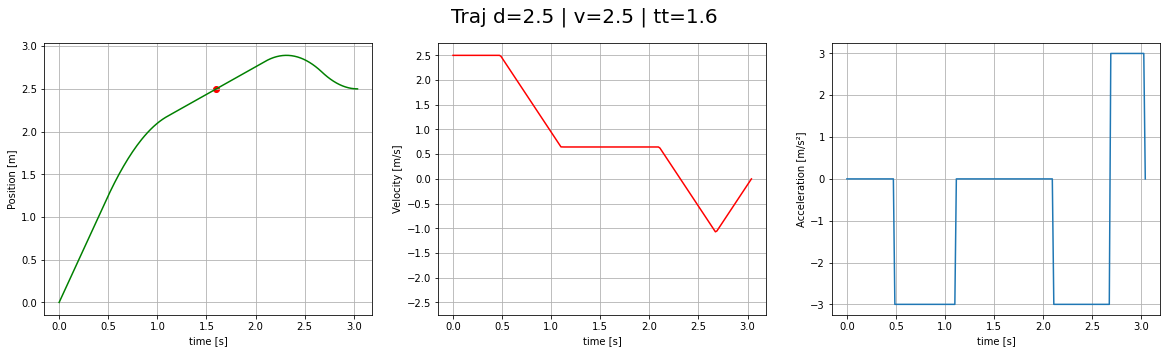

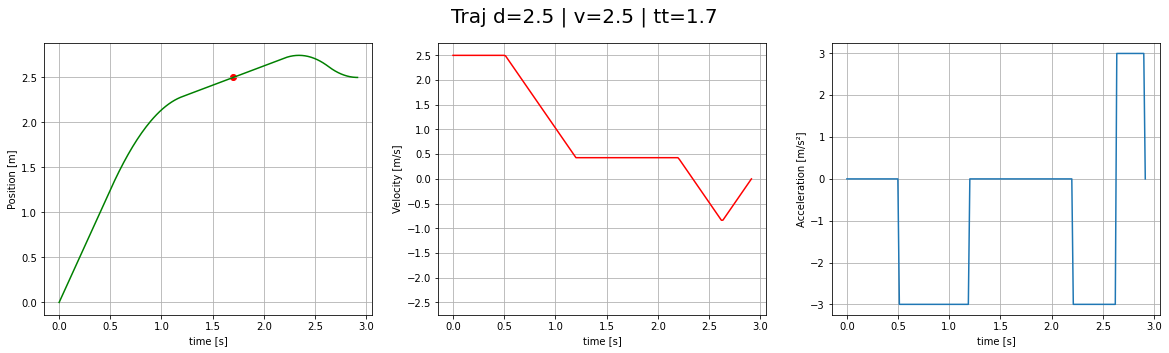

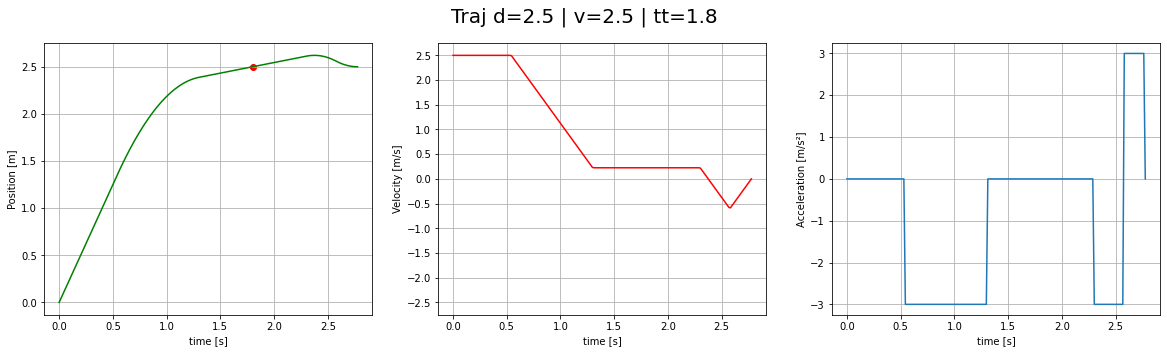

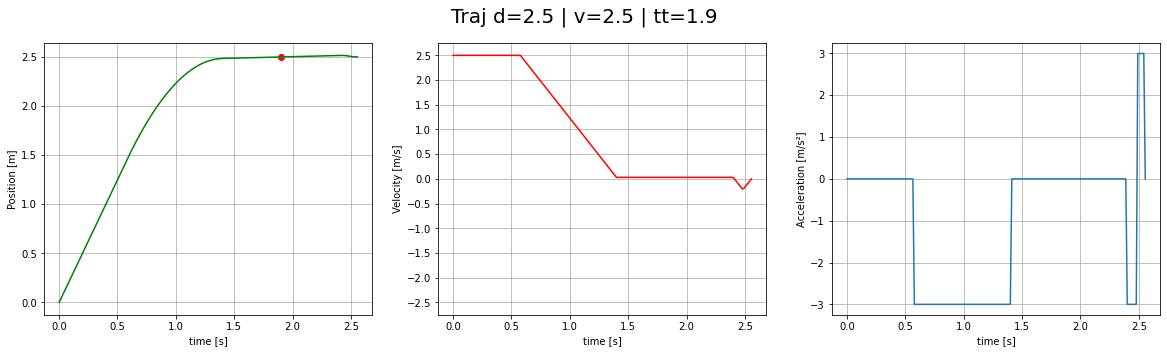

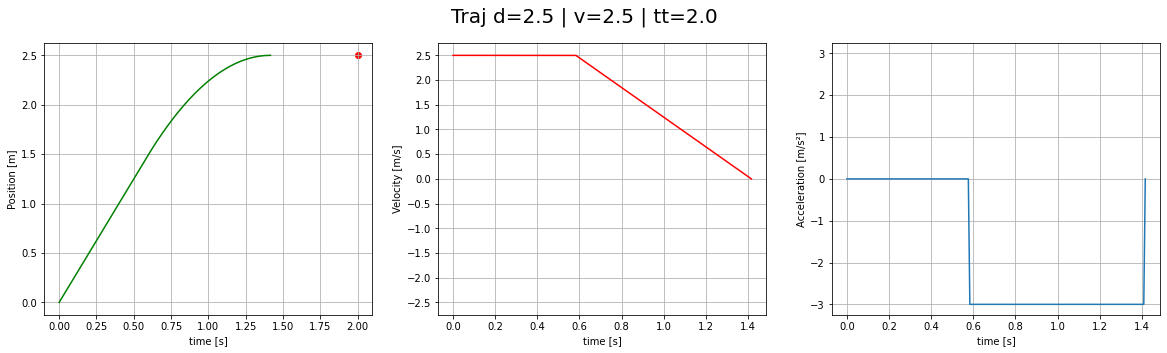

In [4]:
distances = [2.5]
initial_velocities = [2.5]
total_times = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

for d in sorted(set(distances)):
    for i_v in sorted(set(initial_velocities)):
            for tt in sorted(set(total_times)):
                plot_traj(d, i_v, total_time=tt, fallback=True)

